In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Загрузка датасета
df = pd.read_csv('biofam.csv', sep=';')

print(df['idhous'].isna().sum()) # Проверка наличия значений NaN
print(df['idhous'].isin([np.inf, -np.inf]).sum()) # Проверка наличия значений inf или -inf
# Замена значений NaN на среднее значение
mean_value = df['idhous'].mean()
df['idhous'].fillna(mean_value, inplace=True)
# Замена значений inf на другое значение (например, -999)
df.replace([np.inf, -np.inf], -999, inplace=True)

# Преобразование столбцов в целочисленный вид
df['idhous'] = df['idhous'].astype('int')
df['birthyr'] = df['birthyr'].astype('int')

from sklearn.preprocessing import LabelEncoder

# Создание кодировщика
le = LabelEncoder()

# Преобразование строковых значений в числовые значения
df['nat_1_02'] = le.fit_transform(df['nat_1_02'])
df['plingu02'] = le.fit_transform(df['plingu02'])
df['p02r01'] = le.fit_transform(df['p02r01'])
df['p02r04'] = le.fit_transform(df['p02r04'])
df['cspfaj'] = le.fit_transform(df['cspfaj'])
df['cspmoj'] = le.fit_transform(df['cspmoj'])

df['nat_1_02'] = df['nat_1_02'].astype('int')
df['plingu02'] = df['plingu02'].astype('int')
df['p02r01'] = df['p02r01'].astype('int')
df['p02r04'] = df['p02r04'].astype('int')
df['cspfaj'] = df['cspfaj'].astype('int')
df['cspmoj'] = df['cspmoj'].astype('int')
df['a15'] = df['a15'].astype('int')
df['a16'] = df['a16'].astype('int')
df['a17'] = df['a17'].astype('int')
df['a18'] = df['a18'].astype('int')
df['a19'] = df['a19'].astype('int')
df['a20'] = df['a20'].astype('int')
df['a21'] = df['a21'].astype('int')
df['a22'] = df['a22'].astype('int')
df['a23'] = df['a23'].astype('int')
df['a24'] = df['a24'].astype('int')
df['a25'] = df['a25'].astype('int')
df['a26'] = df['a26'].astype('int')
df['a27'] = df['a27'].astype('int')
df['a28'] = df['a28'].astype('int')
df['a29'] = df['a29'].astype('int')
df['a30'] = df['a30'].astype('int')
df['wp00tbgp'] = df['wp00tbgp'].astype('int')
df['wp00tbgs'] = df['wp00tbgs'].astype('int')

# Кодирование категориальных признаков (столбец 'sex')
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

# Разделение датасета на обучающую и тестовую выборки
X = df.drop(['nat_1_02'], axis=1) # Все столбцы, кроме 'nat_1_02', являются признаками
y = df['nat_1_02'] # Столбец 'nat_1_02' является целевой переменной
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание нейронной сети
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# Компиляция модели
model.compile(loss='mse', optimizer='adam')

# Обучение модели
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

# Оценка точности модели
score = model.evaluate(X_test, y_test, verbose=0)
print('Loss (MSE):', score)

224
0
Epoch 1/100
50/50 - 1s - loss: 573618.5000 - 733ms/epoch - 15ms/step
Epoch 2/100
50/50 - 0s - loss: 6457.0796 - 86ms/epoch - 2ms/step
Epoch 3/100
50/50 - 0s - loss: 2943.4746 - 83ms/epoch - 2ms/step
Epoch 4/100
50/50 - 0s - loss: 2128.4438 - 96ms/epoch - 2ms/step
Epoch 5/100
50/50 - 0s - loss: 1542.3322 - 97ms/epoch - 2ms/step
Epoch 6/100
50/50 - 0s - loss: 998.3812 - 94ms/epoch - 2ms/step
Epoch 7/100
50/50 - 0s - loss: 688.6826 - 89ms/epoch - 2ms/step
Epoch 8/100
50/50 - 0s - loss: 460.4545 - 102ms/epoch - 2ms/step
Epoch 9/100
50/50 - 0s - loss: 318.3517 - 81ms/epoch - 2ms/step
Epoch 10/100
50/50 - 0s - loss: 200.7626 - 85ms/epoch - 2ms/step
Epoch 11/100
50/50 - 0s - loss: 127.2717 - 79ms/epoch - 2ms/step
Epoch 12/100
50/50 - 0s - loss: 78.1207 - 91ms/epoch - 2ms/step
Epoch 13/100
50/50 - 0s - loss: 54.4068 - 84ms/epoch - 2ms/step
Epoch 14/100
50/50 - 0s - loss: 43.6407 - 87ms/epoch - 2ms/step
Epoch 15/100
50/50 - 0s - loss: 35.4474 - 99ms/epoch - 2ms/step
Epoch 16/100
50/50 - 0

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Предсказание модели на тренировочных данных
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print('Train MSE:', train_mse)
print('Train R^2:', train_r2)

# Предсказание модели на тестовых данных
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print('Test MSE:', test_mse)
print('Test R^2:', test_r2)

50/50 [==============================] - 0s 4ms/step
Train MSE: 32.87014905132871
Train R^2: -3.231222865662656
13/13 [==============================] - 0s 2ms/step
Test MSE: 41.25354584120556
Test R^2: -4.475086627166115


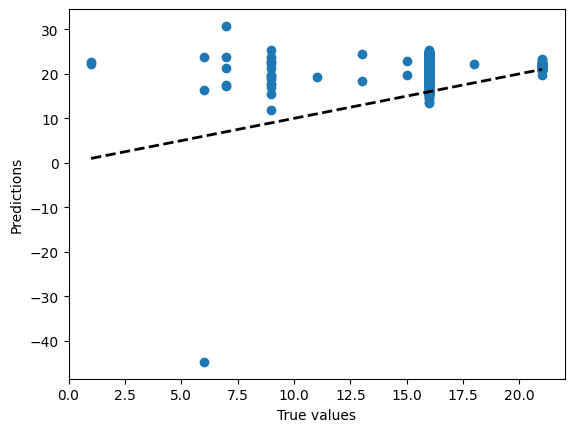

In [32]:
import matplotlib.pyplot as plt

# График точности предсказания модели
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()
